In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
#sys.path.insert(0, '/Users/ammar.tareen/Desktop/Research_projects/mavenn2/')
sys.path.insert(0, '/Users/tareen/Desktop/Research_Projects/2022_mavenn2_github/mavenn')

import mavenn
import logomaker
import seaborn as sns
import re

%matplotlib inline

In [2]:
data_df_full = pd.read_csv('../data/2022.05.15.ace2rbd/ace2rbd_raw_counts_lib1.csv')
y_cols = list(data_df_full.columns[8:])
cols = y_cols.copy()
cols.insert(0,'x')
data_df = data_df_full[cols].copy()
data_df.head(10)

,x,TiteSeq_01_bin1,TiteSeq_01_bin2,TiteSeq_01_bin3,TiteSeq_01_bin4,TiteSeq_02_bin1,TiteSeq_02_bin2,TiteSeq_02_bin3,TiteSeq_02_bin4,TiteSeq_03_bin1,...,TiteSeq_14_bin3,TiteSeq_14_bin4,TiteSeq_15_bin1,TiteSeq_15_bin2,TiteSeq_15_bin3,TiteSeq_15_bin4,TiteSeq_16_bin1,TiteSeq_16_bin2,TiteSeq_16_bin3,TiteSeq_16_bin4
0,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NITNLCPFGEVFSATRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,0,0,0,0,0,0,0,1,...,0,0,21,0,0,0,17,0,0,0
2,NITNLCPFGEVFNATRFASVYCWNRKRISNCVADYSVLYNSASFST...,6,35,162,4,24,85,80,30,10,...,37,0,151,4,0,0,154,19,0,0
3,NITNLCPFGEVFFATRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,1,3,439,1,0,14,307,17,...,82,0,180,12,0,12,306,20,0,0
4,NITNLKPFGEVFNAWRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,0,3,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
5,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,39,7,0,3,83,4,0,14,101,...,0,0,140,4,0,0,56,8,549,0
6,NITNLCPFGEVFNATRFVSVYAWNRKRISNCVADYSVLYNSASFST...,1,1,24,154,0,0,1,104,3,...,2,0,48,0,0,0,102,1,0,0
7,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,0,0,4,0,0,0,1,0,...,0,0,0,0,0,0,3,0,0,0
8,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,1,0,59,7,0,4,53,23,3,...,5,0,4,0,0,0,26,4,0,0
9,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,0,0,16,0,0,0,4,0,...,0,0,8,0,0,0,0,0,0,0


In [3]:
X = data_df['x']
y = data_df[y_cols]

In [4]:
from sklearn.model_selection import train_test_split

# split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
# set positional argumnets for gpmap function
L = len(data_df['x'][0])
alphabet=['A', 'C', 'D', 'E', 'F',
          'G', 'H', 'I', 'K', 'L',
          'M', 'N', 'P', 'Q', 'R',
          'S', 'T', 'V', 'W', 'Y',]


Y = len(y_cols)
print(f'L={L}, Y={Y}')

L=201, Y=64


In [6]:
# instantiate gpmap object
gpmap = mavenn.gpmap.Multi_AdditiveGPMapLayer(L=L, 
                                              alphabet=alphabet,
                                              number_latent_nodes=2)



In [7]:
# read in parameters

# number of reads in each bin summed
N_y = np.sum(y,axis=0)

In [8]:
print(N_y)

TiteSeq_01_bin1     2579236
TiteSeq_01_bin2     1157805
TiteSeq_01_bin3     1626103
TiteSeq_01_bin4     5929980
TiteSeq_02_bin1     2676486
                     ...   
TiteSeq_15_bin4      401678
TiteSeq_16_bin1    10930706
TiteSeq_16_bin2      684127
TiteSeq_16_bin3     1299065
TiteSeq_16_bin4      254070
Length: 64, dtype: int64


#### I approximated these values from Fig 2B

In [9]:
bounds = np.log(np.array([[1,180],[180,1400],[1400,10500],[10500,250000]]))
#bounds = np.array([[0,1.5],[1.5,2],[2.5,3],[3,3.5]])
bounds_df = pd.DataFrame(bounds,columns=['lower_bound','upper_bound'])
f_y_lower_bounds = bounds_df['lower_bound'].values
f_y_upper_bounds = bounds_df['upper_bound'].values
bounds_df

,lower_bound,upper_bound
0,0.000000,5.192957
1,5.192957,7.244228
2,7.244228,9.259131
3,9.259131,12.429216


I don't know how to obtain these values. I based them roughly on Figure 2 from Star et al

In [10]:
mu_neg = 50
mu_pos = 700000
sigma_neg = 100
sigma_pos = 50000

# mu_neg = 50
# mu_pos = 5000
# sigma_neg = 100
# sigma_pos = 500


In [11]:
mu_neg, sigma_neg

(50, 100)

In [12]:
f_y_upper_bounds

array([ 5.19295685,  7.24422752,  9.25913054, 12.4292162 ])

In [13]:
#np.arange(10**(-13),10**(-6),10**(-12))
cs = [0,10**(-13),10**(-12.5),
     10**(-12),10**(-11.5),
     10**(-11),10**(-10.5),
     10**(-10),10**(-9.5),
     10**(-9),10**(-8.5),
     10**(-8),10**(-7.5),
     10**(-7),10**(-6.5),
     10**(-6)]

#cs = np.arange(0.1,1,0.06)

In [14]:
mp_list = [mavenn.measurement_process_layers.TiteSeqMP(N_y=N_y,
                                                         c=cs[mp_idx],
                                                         Y=4,
                                                         mu_pos=mu_pos,
                                                         sigma_pos=sigma_pos,
                                                         mu_neg=mu_neg,
                                                         sigma_neg=sigma_neg,
                                                         f_y_lower_bounds=f_y_lower_bounds,
                                                         f_y_upper_bounds=f_y_upper_bounds,
                                                         info_for_layers_dict={'H_y_norm':0},
                                                         eta=1e-5,)
           for mp_idx in range(len(y_cols)//4)
          ]

In [15]:
# TiteSeq_mp_1 = mavenn.measurement_process_layers.TiteSeqMP(N_y=N_y,
#                                                          c=1e-3,
#                                                          Y=4,
#                                                          mu_pos=mu_pos,
#                                                          sigma_pos=sigma_pos,
#                                                          mu_neg=mu_neg,
#                                                          sigma_neg=sigma_neg,
#                                                          f_y_lower_bounds=f_y_lower_bounds,
#                                                          f_y_upper_bounds=f_y_upper_bounds,
#                                                          info_for_layers_dict={'H_y_norm':0},
#                                                          eta=1e-5,
#                                                          )

# TiteSeq_mp_2 = mavenn.measurement_process_layers.TiteSeqMP(N_y=N_y,
#                                                          c=1e-3,
#                                                          Y=4,
#                                                          mu_pos=mu_pos,
#                                                          sigma_pos=sigma_pos,
#                                                          mu_neg=mu_neg,
#                                                          sigma_neg=sigma_neg,
#                                                          f_y_lower_bounds=f_y_lower_bounds,
#                                                          f_y_upper_bounds=f_y_upper_bounds,
#                                                          info_for_layers_dict={'H_y_norm':0},
#                                                          eta=1e-5,
#                                                          )

In [16]:
model = mavenn.Model2(gpmap=gpmap,
                      mp_list=mp_list)

2022-06-01 21:25:15.735070: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [17]:
model.model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Sequence_labels_input (InputLa  [(None, 4084)]      0           []                               
 yer)                                                                                             
                                                                                                  
 Sequence_only (Lambda)         (None, 4020)         0           ['Sequence_labels_input[0][0]']  
                                                                                                  
 multi__additive_gp_map_layer (  (None, 2)           8042        ['Sequence_only[0][0]']          
 Multi_AdditiveGPMapLayer)                                                                        
                                                                                              

In [18]:
# Set training data
model.set_data(x=x_train,
               
               y_list=[
                       y_train[y_cols[0:4]].values,
                       y_train[y_cols[4:8]].values,
                       y_train[y_cols[8:12]].values,
                       y_train[y_cols[12:16]].values,
                       y_train[y_cols[16:20]].values,
                       y_train[y_cols[20:24]].values,
                       y_train[y_cols[24:28]].values,
                       y_train[y_cols[28:32]].values,
                       y_train[y_cols[32:36]].values,
                       y_train[y_cols[36:40]].values,
                       y_train[y_cols[40:44]].values,
                       y_train[y_cols[44:48]].values,
                       y_train[y_cols[48:52]].values,
                       y_train[y_cols[52:56]].values,                   
                       y_train[y_cols[56:60]].values,                                      
                       y_train[y_cols[60:64]].values,                                                         
                      ],

               shuffle=False)

N = 74,560 observations set as training data.
Using 19.9% for validation.
Time to set data: 11.9 sec.


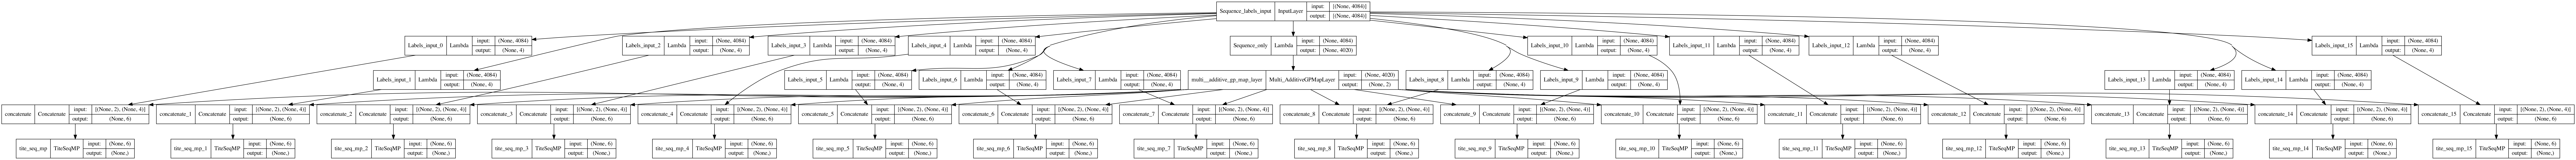

In [19]:
from tensorflow.keras.utils import plot_model
plot_model(model.model,show_shapes=True,show_dtype=False,dpi=200,to_file='titeseq_mp_16_heads.png')

In [20]:

# Fit model to data
model.fit(learning_rate=.0001,
          epochs=40,
          batch_size=500,
          try_tqdm = False,
          early_stopping=True,
          early_stopping_patience=10,
          linear_initialization=False)

Epoch 1/40
120/120 [==============================] - 17s 51ms/step - loss: 8662673.0000 - tite_seq_mp_loss: 481562.5938 - tite_seq_mp_1_loss: 504043.3438 - tite_seq_mp_2_loss: 508356.1250 - tite_seq_mp_3_loss: 551109.6875 - tite_seq_mp_4_loss: 540743.9375 - tite_seq_mp_5_loss: 572772.6250 - tite_seq_mp_6_loss: 528163.7500 - tite_seq_mp_7_loss: 529237.6875 - tite_seq_mp_8_loss: 500857.8438 - tite_seq_mp_9_loss: 531966.6875 - tite_seq_mp_10_loss: 690812.4375 - tite_seq_mp_11_loss: 736421.8125 - tite_seq_mp_12_loss: 534841.6875 - tite_seq_mp_13_loss: 499771.7500 - tite_seq_mp_14_loss: 453657.4375 - tite_seq_mp_15_loss: 498357.1250 - I_var: -9.1830 - val_loss: 8091425.0000 - val_tite_seq_mp_loss: 455968.6250 - val_tite_seq_mp_1_loss: 472035.3438 - val_tite_seq_mp_2_loss: 478545.7188 - val_tite_seq_mp_3_loss: 514846.2812 - val_tite_seq_mp_4_loss: 505575.1875 - val_tite_seq_mp_5_loss: 539099.0000 - val_tite_seq_mp_6_loss: 502026.0625 - val_tite_seq_mp_7_loss: 495096.0625 - val_tite_seq_mp_8

120/120 [==============================] - 3s 24ms/step - loss: 8665063.0000 - tite_seq_mp_loss: 481655.5312 - tite_seq_mp_1_loss: 504215.7188 - tite_seq_mp_2_loss: 508483.0312 - tite_seq_mp_3_loss: 551261.0000 - tite_seq_mp_4_loss: 540910.7500 - tite_seq_mp_5_loss: 572933.5000 - tite_seq_mp_6_loss: 528400.8125 - tite_seq_mp_7_loss: 529440.3750 - tite_seq_mp_8_loss: 500978.5938 - tite_seq_mp_9_loss: 532135.5625 - tite_seq_mp_10_loss: 690798.2500 - tite_seq_mp_11_loss: 736679.1875 - tite_seq_mp_12_loss: 534983.1250 - tite_seq_mp_13_loss: 500015.0000 - tite_seq_mp_14_loss: 453882.4688 - tite_seq_mp_15_loss: 498287.8438 - I_var: -9.1843 - val_loss: 8091425.0000 - val_tite_seq_mp_loss: 455968.6250 - val_tite_seq_mp_1_loss: 472035.3438 - val_tite_seq_mp_2_loss: 478545.7188 - val_tite_seq_mp_3_loss: 514846.2812 - val_tite_seq_mp_4_loss: 505575.1875 - val_tite_seq_mp_5_loss: 539099.0000 - val_tite_seq_mp_6_loss: 502026.0625 - val_tite_seq_mp_7_loss: 495096.0625 - val_tite_seq_mp_8_loss: 46681

On test data:


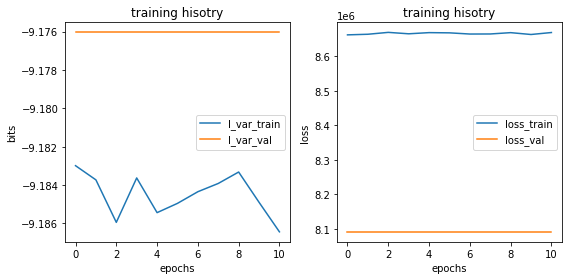

In [21]:
# Show training history
print('On test data:')
# x_test = test_df['x'].values
# y_test = test_df[y_cols].values


I_var_hist = model.history['I_var']
val_I_var_hist = model.history['val_I_var']

fig, axs = plt.subplots(1,2,figsize=[8,4])

ax = axs[0]
ax.plot(I_var_hist, label='I_var_train')
ax.plot(val_I_var_hist, label='I_var_val')
ax.legend()
ax.set_xlabel('epochs')
ax.set_ylabel('bits')
#ax.set_xscale('log')
ax.set_title('training hisotry')

ax = axs[1]
ax.plot(model.history['loss'], label='loss_train')
ax.plot(model.history['val_loss'], label='loss_val')
# ax.set_xlim(100,300)
# ax.set_ylim(0.7*1e6,0.8*1e6)
ax.legend()
ax.set_xlabel('epochs')
ax.set_ylabel('loss')
# ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_title('training hisotry')
fig.tight_layout()

In [22]:
#phi = gpmap.x_to_phi(x_test)
gpmap.weights[1].numpy().shape

(1, 2, 201, 20)

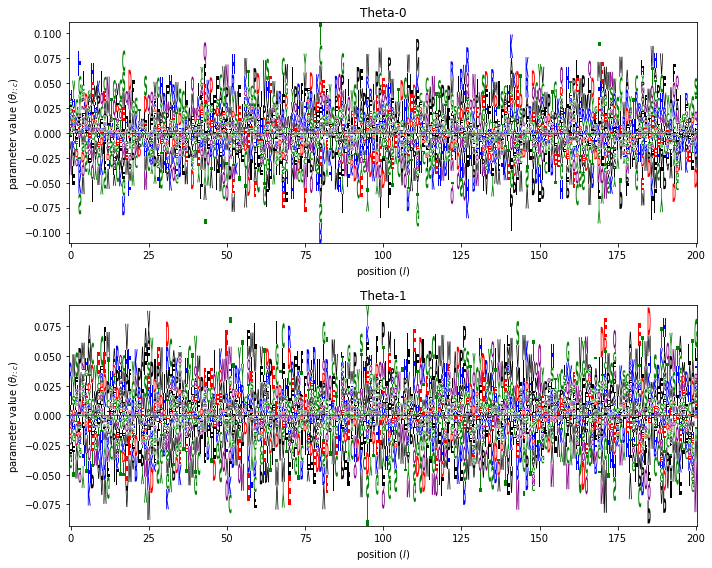

In [23]:
# Get G-P map parameters in matrix form
theta_0 = np.squeeze(gpmap.weights[1].numpy()[0][0])
theta_1 = np.squeeze(gpmap.weights[1].numpy()[0][1])

# Create grid in phi space
#phi_lim = [-5, 3]
phi_lim = [-5, 3]
phi_grid = np.linspace(phi_lim[0], phi_lim[1], 1000)

# Create array of allowable y values
Y = 10    # Y = number of bins
y_lim = [-.5, Y-.5]
y_all = range(Y)

# Compute matrix of p(y|phi) values
#measurement_process = sortseq_mp.p_of_all_y_given_phi(phi).numpy()
# measurement_process_2 = mp_mpa_2.p_of_all_y_given_phi(phi).numpy()
# measurement_process_3 = mp_mpa_3.p_of_all_y_given_phi(phi).numpy()

#measurement_process = np.hstack([measurement_process_1,measurement_process_2,measurement_process_3])

# Create figure with two panels
fig, axs = plt.subplots(2,1,figsize=[10,8])

ax = axs[0]
# Left panel: draw logo using logomaker
logo_1 = logomaker.Logo(pd.DataFrame(theta_0,columns=model.alphabet), ax=ax,center_values=True, color_scheme='chemistry')
ax.set_ylabel(r'parameter value ($\theta_{l:c}$)')
ax.set_xlabel(r'position ($l$)')
ax.set_title('Theta-0')

ax = axs[1]
logo_2 = logomaker.Logo(pd.DataFrame(theta_1,columns=model.alphabet), ax=ax,center_values=True, color_scheme='chemistry')
ax.set_ylabel(r'parameter value ($\theta_{l:c}$)')
ax.set_xlabel(r'position ($l$)')
ax.set_title('Theta-1')


# Right panel: draw measurement process as heatmap
# ax = axs[1]
# im = ax.imshow(np.sort(measurement_process,axis=0).T,
#                cmap='Greens',
#                extent=phi_lim+y_lim,
#                vmin=0,
#                origin='lower',
#                interpolation='nearest',
#                aspect="auto")
# ax.set_yticks(y_all)
# ax.set_ylabel('bin number (y)')
# ax.set_xlabel('latent phenotype ($\phi$)')
# ax.set_title('measurement process')
# cb = plt.colorbar(im)
# cb.set_label('probability  $p(y|\phi)$', rotation=-90, va="bottom")

# Fix up plot
fig.tight_layout(w_pad=3)
#fig.savefig('sortseq_g-p_map_mpa_visualization.png')
plt.show()

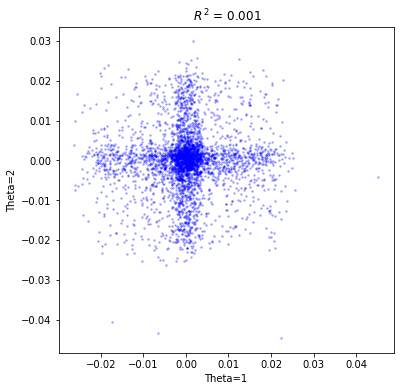

In [24]:
plt.figure(figsize=(6,6))
Rsq = np.corrcoef(logo_1.df.values.ravel(),logo_2.df.values.ravel())[0,1]**2
plt.scatter(logo_1.df.values.ravel(),logo_2.df.values.ravel(),s=2.5,alpha=0.25,color='blue')
# lims = [-0.6,0.3]
# plt.xlim([-0.5,0.3])
# plt.ylim([-0.5,0.3])
# plt.plot(lims,lims,'--',c='black',zorder=-1)
plt.xlabel('Theta=1')
plt.ylabel('Theta=2')
plt.title(f' $R^2$ = {Rsq:.3f}')
plt.show()

In [25]:
# # Create grid in phi space
# phi_lim = [-5, 3]
# phi_grid = np.linspace(phi_lim[0], phi_lim[1], 1000)

# # Create array of allowable y values
# Y = mp_list[0].Y    # Y = number of bins
# y_lim = [-.5, Y-.5]
# y_all = range(Y)

# # Compute matrix of p(y|phi) values



# # Create figure with two panels
# fig, axs = plt.subplots(4,4,figsize=[16,16])

# mp_counter = 0
# for i in range(4):
#     for j in range(4):
        
#         measurement_process = mp_list[mp_counter].p_of_y_given_phi(y_all, phi_grid)
#         # Right panel: draw measurement process as heatmap
#         ax = axs[i,j]

#         im = ax.imshow(measurement_process,
#                        cmap='Greens',
#                        extent=phi_lim+y_lim,
#                        vmin=0,
#                        origin='lower',
#                        interpolation='nearest',
#                        aspect="auto")
#         ax.set_yticks(y_all)
#         ax.set_ylabel('bin number (y)')
#         ax.set_xlabel('latent phenotype ($\phi$)')
#         ax.set_title(f'Titeseq MP-{mp_counter+1}')
#         mp_counter+=1
        
# cb = plt.colorbar(im)
# cb.set_label('probability  $p(y|\phi)$', rotation=-90, va="bottom")
# fig.tight_layout()

# fig.savefig('ace2rbd_measurment_prcoess_titeseqMP.png',dpi=300,bbox_inches='tight')
